In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
df= pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [12]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [13]:
df.drop(columns=['Email No.'], inplace= True)

In [14]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [15]:
X= df.drop(columns=['Prediction'])
Y= df['Prediction']

<Axes: xlabel='Prediction', ylabel='count'>

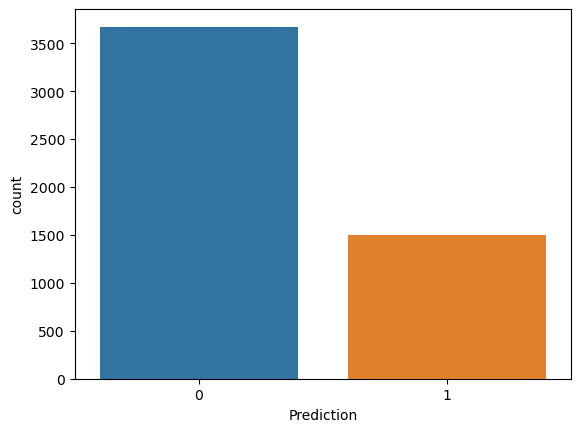

In [19]:
sns.countplot(x= Y)

In [22]:
Y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
X_train, X_test, Y_train, Y_test= train_test_split(X_scaled, Y, test_size=0.25, random_state= 0 )

In [32]:
errors= []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    errors.append(np.mean((Y_test != pred)))
    
min_val = min(errors)


In [33]:
min_index= errors.index(min_val)

In [37]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, Y_train)
Y_pred_knn= knn.predict(X_test)

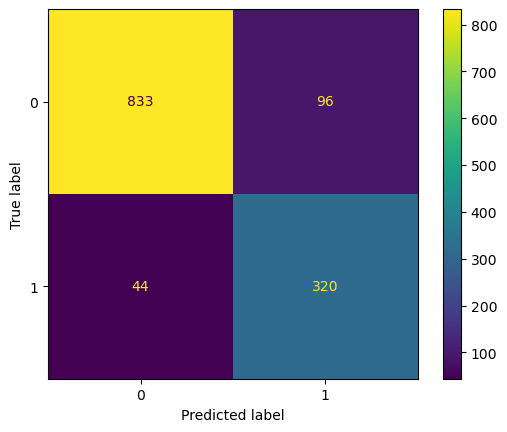

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn)

In [40]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       929
           1       0.77      0.88      0.82       364

    accuracy                           0.89      1293
   macro avg       0.86      0.89      0.87      1293
weighted avg       0.90      0.89      0.89      1293



In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(Y_test, Y_pred_knn)

0.8917246713070379

In [47]:
svm= SVC(kernel= 'linear')
svm.fit(X_train, Y_train)
Y_pred_svm1= svm.predict(X_test)

In [48]:
svm= SVC(kernel= 'rbf')
svm.fit(X_train, Y_train)
Y_pred_svm2= svm.predict(X_test)

In [49]:
svm= SVC(kernel= 'poly')
svm.fit(X_train, Y_train)
Y_pred_svm3= svm.predict(X_test)

In [50]:
svm= SVC(kernel= 'sigmoid')
svm.fit(X_train, Y_train)
Y_pred_svm4= svm.predict(X_test)

In [52]:
print(accuracy_score(Y_test, Y_pred_svm1))
print(accuracy_score(Y_test, Y_pred_svm2))
print(accuracy_score(Y_test, Y_pred_svm3))
print(accuracy_score(Y_test, Y_pred_svm4))

0.9767981438515081
0.9450889404485692
0.7548337200309359
0.839907192575406


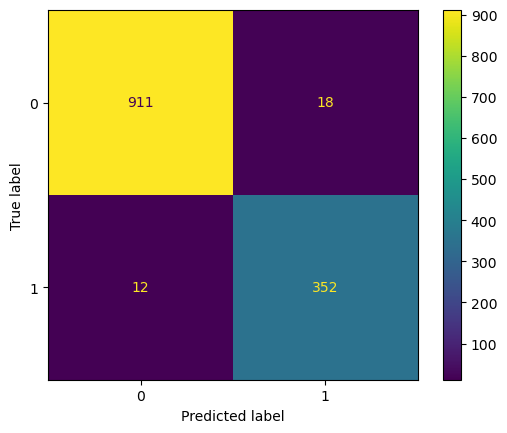

In [53]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_svm1)

In [54]:
print(classification_report(Y_test, Y_pred_svm1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293

